In [6]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Perceptron CLassifier
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)
per_clf=Perceptron(random_state=12)
per_clf.fit(X,y)
per_clf.predict([[2,0.5]])


KeyboardInterrupt



In [39]:
# TF DNN CLassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.9,random_state=12)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100],n_classes=2,feature_columns=feature_columns)
dnn_clf.fit(x=X_train,y=y_train,batch_size=10,steps=4000)

from sklearn.metrics import accuracy_score
y_pred = list(dnn_clf.predict(X_test))
accuracy_score(y_test,y_pred)

TypeError: object of type 'Tensor' has no len()

In [9]:
dnn_clf.evaluate(X_test,y_test)

INFO:tensorflow:Starting evaluation at 2019-06-27T07:18:33Z


INFO:tensorflow:Starting evaluation at 2019-06-27T07:18:33Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Sai\AppData\Local\Temp\tmp1lp7t5eh\model.ckpt-4000


INFO:tensorflow:Restoring parameters from C:\Users\Sai\AppData\Local\Temp\tmp1lp7t5eh\model.ckpt-4000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-06-27-07:18:36


INFO:tensorflow:Finished evaluation at 2019-06-27-07:18:36


INFO:tensorflow:Saving dict for global step 4000: accuracy = 1.0, accuracy/baseline_label_mean = 0.34074074, accuracy/threshold_0.500000_mean = 1.0, auc = 1.0, auc_precision_recall = 1.0, global_step = 4000, labels/actual_label_mean = 0.34074074, labels/prediction_mean = 0.34164387, loss = 0.0015394549, precision/positive_threshold_0.500000_mean = 1.0, recall/positive_threshold_0.500000_mean = 1.0


INFO:tensorflow:Saving dict for global step 4000: accuracy = 1.0, accuracy/baseline_label_mean = 0.34074074, accuracy/threshold_0.500000_mean = 1.0, auc = 1.0, auc_precision_recall = 1.0, global_step = 4000, labels/actual_label_mean = 0.34074074, labels/prediction_mean = 0.34164387, loss = 0.0015394549, precision/positive_threshold_0.500000_mean = 1.0, recall/positive_threshold_0.500000_mean = 1.0


{'loss': 0.0015394549,
 'accuracy': 1.0,
 'labels/prediction_mean': 0.34164387,
 'labels/actual_label_mean': 0.34074074,
 'accuracy/baseline_label_mean': 0.34074074,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'accuracy/threshold_0.500000_mean': 1.0,
 'precision/positive_threshold_0.500000_mean': 1.0,
 'recall/positive_threshold_0.500000_mean': 1.0,
 'global_step': 4000}

In [4]:
# Training DNN using Plain TF
import numpy as np
import tensorflow as tf
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.astype(np.float32)
X_train=X_train.reshape(60000,784)
X_test=X_test.astype(np.float32)
X_test=X_test.reshape(10000,784)
y_train=y_train.astype(np.int64)
y_test=y_test.astype(np.int64)
print(X_train.shape)
print(y_train.shape)
n_inputs=28*28
n_hidden_1=300
n_hidden_2=100
n_outputs=10

X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y=tf.placeholder(tf.int64,shape=(None),name="y")

# Construction Phase

def neuron_layer(X, n_neurons , name ,activation=None):
    with tf.name_scope(name):
        n_inputs=int(X.shape[1])
        stddev=2/np.sqrt(n_inputs)
        init=tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
        W=tf.Variable(init,name="weights")
        b=tf.Variable(tf.zeros([n_neurons]),name="biases")
        z=tf.matmul(X,W)+b
        if activation == "relu":
            return tf.nn.relu(z)
        else :
            return z
        
with tf.name_scope("dnn"):
    hidden1=neuron_layer(X,n_hidden_1,"hidden1",activation="relu")
    hidden2=neuron_layer(hidden1,n_hidden_2,"hidden2",activation="relu")
    logits=neuron_layer(hidden2,n_outputs,"outputs")
    
'''
from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn_fully_connected"):
    hidden1_fc=fully_connected(X_train,n_hidden_1,scope="hidden1_fc")
    hidden2_fc=fully_connected(hidden1_fc,n_hidden_2,scope="hidden2_fc")
    output_layer_fc=fully_connected(hidden2_fc,n_outputs,scope="output_fc",activation_fn=None)
    
'''
    
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(
                    labels=y,logits=logits)
    loss=tf.reduce_mean(xentropy,name="loss")

learning_rate=0.01
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate)
    training_op=optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct=tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()
saver=tf.train.Saver()

(60000, 784)
(60000,)


In [5]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist=input_data.read_data_sets("/tmp/data/")

n_epochs = 20 
batch_size =50

#Execution Phase
with tf.Session() as sess: 
    init.run() 
    for epoch in range(n_epochs): 
        for i in range(mnist.train.num_examples // batch_size): 
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch}) 
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch}) 
        acc_test = accuracy.eval(feed_dict={X:mnist.test.images,y: mnist.test.labels}) 
        print( epoch , "Train Accuracy :",acc_train , "Test Accuracy : ",acc_test) 
    save_path=saver.save(sess,"./mnist_model_final.ckpt")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0 Train Accuracy : 0.94 Test Accuracy :  0.9124
1 Train Accuracy : 0.9 Test Accuracy :  0.9291
2 Train Accuracy : 0.92 Test Accuracy :  0.9369
3 Train Accuracy : 0.94 Test Accuracy :  0.9445
4 Train Accuracy : 0.98 Test Accuracy :  0.9496
5 Train Accuracy : 0.96 Test Accuracy :  0.9537
6 Train Accuracy : 0.92 Test Accuracy :  0.9555
7 Train Accuracy : 1.0 Test Acc

In [38]:
# To Use NN

with tf.Session() as sess:
    saver.restore(sess,"./mnist_model_final.ckpt")
    X_new_scaled=X_train[678].reshape(-1,784)
    Z = logits .eval(feed_dict={X:X_new_scaled})
    y_pred = np.argmax(Z,axis=1)
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./mnist_model_final.ckpt
[1]


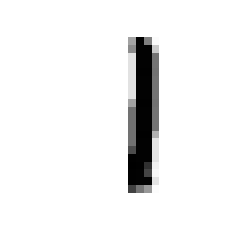

In [36]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_new_scaled.reshape(28,28),cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()